<div class="alert alert-block alert-info" style="margin-top: 20px; background-color:#DCDCDC">
<strong>Classification</strong> Find what class a sample belongs to.
</div>

# K-Nearest Neighbor Classification

## Overview

- [Description](#Description)
    - [Nearest Neighbor Algorithms](#Nearest-Neighbor-Algorithms)
- [K-Nearest Neighbors](#K-Nearest-Neighbors)
- [EXAMPLE - Decision Boundaries Visualization](#EXAMPLE---Decision-Boundaries-Visualization)

## Description

The principle behind **nearest neighbor** methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. The similarity measure is dependent on the type of data. For real-valued data, the Euclidean distance can be used. Other other types of data such as categorical or binary data, Hamming distance can be used.  

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<strong>Minkowski distance</strong>
<br/>
    $$d(\mathbf{x}, \mathbf{y})=\left({\sum_{i} \lvert{x_i-y_i}\rvert^p}\right)^{\frac{1}{p}}$$
<ul>
<li>p=2: Euclidean distance</li>
<li>p=1: Manhatan distance</li>
</ul>
</div>

Each new prediction made, the algorithm has to again find the nearest neighbors to that sample in order to call a vote for it. This process is where a majority of the time is spent, so instead of using **brute force** to search the training data as if it were stored in a list, **tree structures** are used instead to optimize the search times (Ball Tree or KD Tree). Due to this, the number of classes in dataset doesn't have a bearing on its execution speed. Only the number of records in your training data set.

Neighbors-based methods are known as *non-parametric or non-linear, non-generalizing* machine learning methods, since they simply “remember” all of its training data (possibly transformed into a fast indexing structure such as a Ball Tree or KD Tree.).

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<strong>Parametric versus Non-parametric models</strong>
<br/>
Machine learning algorithms can be grouped into **parametric** and **non-parametric** models.
<ul>
<li>**Parametric models:** A set of parameters are estimated from the training dataset to learn a function that can classify new data points without requiring the original training dataset anymore. Examples: [perceptron](./02 Perceptron Classification.ipynb), [logistic regression](./03 Perceptron Classification.ipynb) and [linear SVM](./04 Simple Vector Machine Classification).</li>
<li>**Non-parametric models:** These models cannot be characterized by a fixed set of parameters and the number of parameters grows with the training data. Examples: [decision tree](./05 Decision Tree Classification.ipynb), [random forest](./06 Random Forest.ipynb), [kernel SVM](./04 Simple Vector Machine Classification) and the [K-Nearest Neighbor]().</li>
</ul>
</div>

Despite its simplicity, nearest neighbors has been successful in a large number of classification and regression problems, including handwritten digits or satellite image scenes. Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.

As stated before, the nearest neighbors classifier predicts the class of a data point to be the most common class among that point's neighbors. Neighbors-based classification is a type of **instance-based learning or non-generalizing learning**: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

The **optimal choice of the value k** is highly data-dependent: in general a larger k suppresses the effects of noise, but makes the classification boundaries less distinct. The right choice ok k is crucial to find a good balance between overfitting and underfitting.

The basic nearest neighbors classification uses uniform weights: that is, the value assigned to a query point is computed from a simple majority vote of the nearest neighbors. Under some circumstances, it is better to weight the neighbors such that nearer neighbors contribute more to the fit.

### Nearest Neighbor Algorithms

**Brute Force** - The most naive neighbor search implementation involves the brute-force computation of distances between all pairs of points in the dataset: for N samples in D dimensions, this approach scales as $O(D \cdot N^2)$. Efficient brute-force neighbors searches can be very competitive for small data samples. However, as the number of samples N grows, the brute-force approach quickly becomes infeasible-  

**KD Tree** - It's a variety of tree-based data structure that it's used to address the computational limitations of the brute force approach. This structure attempts to reduce the number of distance calculations by efficiently encoding aggregate distance information for the sample. The computational cost can be reduced to $O(D \cdot N \cdot log(N))$ or better. As D grows very large this approach becomes inefficient (curse of dimensionality)  

**Ball Tree** - To address the inefficiencies of KD Tree in higher dimensions. Where KD trees partition data along Cartesian axes, ball trees partition data in a series of nesting hyper-spheres. This makes tree construction more costly but results in a data structure which can be very efficient on highly structured data, even in very high dimensions.

## K-Nearest Neighbors

[K-Nearest Neighbors](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) implements the K-Nearest Neighbors algorithm for classification. The KNN algorithm can be summarized by the following steps:

1. Choose the number ok *k* and a distance metric
2. Find the *k* nearest neighbors of the sample that we want to classify
3. Assign the class label by majority vote

As with all algorithms dependent on distance measures, it is also sensitive to **feature scaling**

It is important to mention that KNN is very susceptible to overfitting due to the **[curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality#k-nearest_neighbor_classification)**. The curse of dimensionality describes the phenomenon where the feature space becomes increansingly sparse for an increasing number of dimensions of a fixed-sized training data set. Intuitively, we can think of even the closest neighbors being too far away in a high-dimensional space to give a good estimate. We can use *feature selection* and *dimensionality reduction* techniques to help us avoid the curse of dimensionality in those models where *regularization* is not applicable. 

<div class="alert alert-block alert-info" style="margin-top: 20px">
<strong>KNeighborsClassifier</strong> (n_neighbors=5, weights='uniform', algorithm='auto', metric='minkowski', p=2)
<br/>
Parameters:
<ul>
<li>n_neighbors: number of neighbors to use</li>
<li>weights: weight function to use in prediction (uniform, distance or user-defined function)</li>
<li>algorithm: algorithm used to compute the nearest neighbor</li>
<li>metric: the distance metric to use.</li>
<li>p: power parameter for the Minkowski metric. Manhatan distance for p=1 and Euclidean distance for p=2</li>
</ul>
</div>

In [1]:
# load libraries and set plot parameters
import numpy as np
import pandas as pd
# import PrettyTable as pt

import matplotlib.pyplot as plt
%matplotlib inline

# plots configuration
# plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['legend.fontsize'] = 11

In [2]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

dataset = load_iris()
print(dataset['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['class'] = pd.Series(dataset.target, name='class')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [7]:
knn.classes_

array([0, 1, 2])

In [8]:
knn.effective_metric_

'euclidean'

In [9]:
print('Accuracy: {0}'.format(knn.score(X_test, y_test)))
y_pred = knn.predict(X_test)
print('Number of milabeled points: {0}'.format((y_test!=y_pred).sum()))

Accuracy: 0.9111111111111111
Number of milabeled points: 4


### Using Feature Scaling

[See Feature Scaling](../00 Data Preparation/03_Feature_Scaling.ipynb)

**Standardization** of datasets is a **common requirement for many machine learning estimators**; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_mean=True, with_std=True)
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [11]:
pd.DataFrame(X_train_std, columns=X_train.columns).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.050000e+02,1.050000e+02,1.050000e+02,1.050000e+02
mean,1.093305e-15,-1.259574e-15,8.458842e-17,4.631216e-16
std,1.004796e+00,1.004796e+00,1.004796e+00,1.004796e+00
min,-1.767423e+00,-2.363473e+00,-1.427509e+00,-1.363931e+00
25%,-8.319249e-01,-5.635479e-01,-1.204626e+00,-1.234910e+00
50%,-1.303015e-01,-1.135667e-01,2.441093e-01,1.843150e-01
75%,5.713219e-01,5.614051e-01,8.013153e-01,8.294174e-01
max,2.442318e+00,3.036302e+00,1.804286e+00,1.732561e+00


In [12]:
pd.DataFrame(X_test_std, columns=X_test.columns).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,45.000000,45.000000,45.000000,45.000000
mean,0.124362,0.026427,0.179721,0.178581
std,0.881902,0.914280,0.929348,0.934824
min,-1.533548,-1.913491,-1.483229,-1.363931
25%,-0.481113,-0.563548,-1.093185,-0.976869
50%,0.103573,-0.113567,0.466992,0.442356
75%,0.805196,0.561405,0.801315,0.829417
max,1.623757,2.361330,1.358521,1.732561


In [13]:
knn.fit(X_train_std, y_train)
print('Accuracy: {0}'.format(knn.score(X_test_std, y_test)))
y_pred = knn.predict(X_test_std)
print('Number of milabeled points: {0}'.format((y_test!=y_pred).sum()))

Accuracy: 0.9111111111111111
Number of milabeled points: 4


## EXAMPLE - Decision Boundaries Visualization

For visualization purposes we will choose two features: petal widh and petal length

In [14]:
from modules import plot_decision_regions

X = df.drop(labels=['class','sepal length (cm)', 'sepal width (cm)'], axis=1)
y = df['class']
X.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Accuracy: 0.9111111111111111
Number of mislabeled points: 4


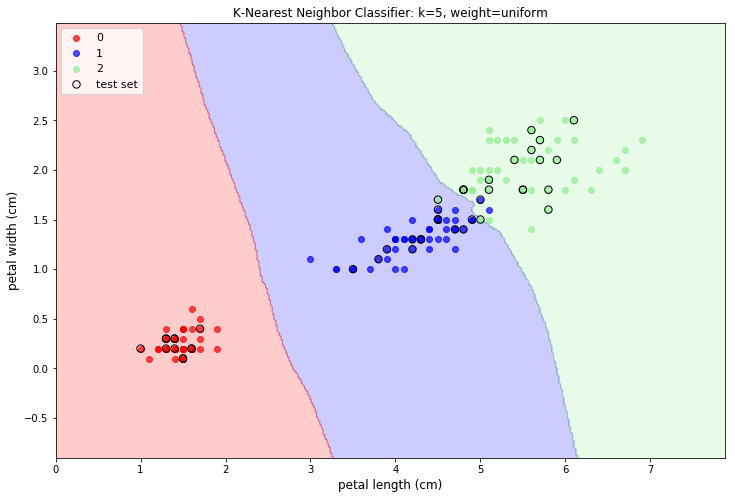

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

plot_decision_regions(X_train, X_test, y_train, y_test, classifier=knn, test_marker=True)
plt.title('K-Nearest Neighbor Classifier: k=5, weight=uniform')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

Accuracy: 0.9111111111111111
Number of mislabeled points: 4


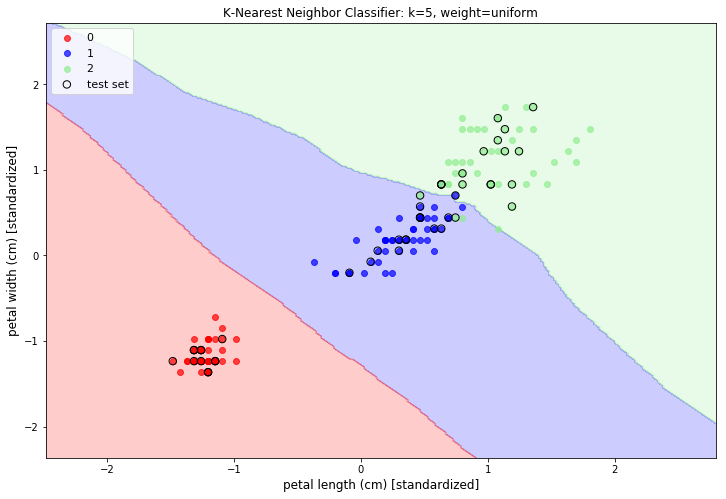

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_mean=True, with_std=True)
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)

plot_decision_regions(X_train_std, X_test_std, y_train, y_test, classifier=knn, test_marker=True)
plt.title('K-Nearest Neighbor Classifier: k=5, weight=uniform')
plt.xlabel('petal length (cm) [standardized]')
plt.ylabel('petal width (cm) [standardized]')

Accuracy: 0.9111111111111111
Number of mislabeled points: 4


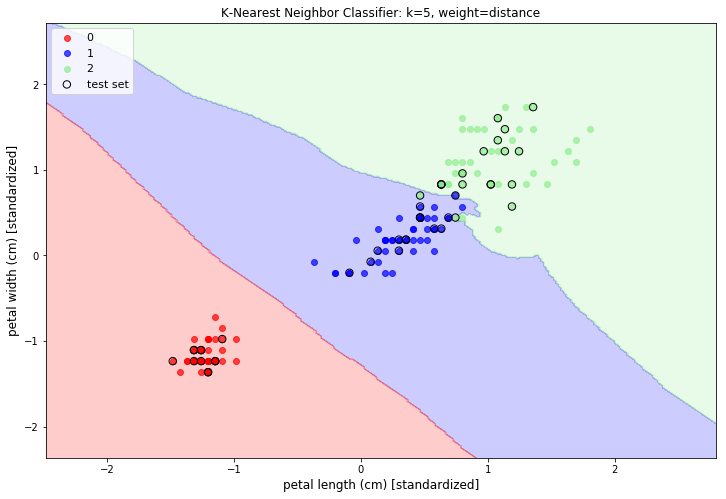

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_mean=True, with_std=True)
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_train_std, X_test_std, y_train, y_test, classifier=knn, test_marker=True)
plt.title('K-Nearest Neighbor Classifier: k=5, weight=distance')
plt.xlabel('petal length (cm) [standardized]')
plt.ylabel('petal width (cm) [standardized]')